# Problem Statement: -
A Mobile Phone manufacturing company wants to launch its three brand new phone into the market, but before going with its traditional marketing approach this time it want to analyze the data of its previous model sales in different regions and you have been hired as an Data Scientist to help them out, use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.


# Objective :- 
    use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.
    

In [3]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#book = []
#with open("D:\\360Digi\\book.csv") as f:
#    book = f.read()
myphonedata = pd.read_csv("D:\\360Digi\\myphonedata.csv")
myphonedata


,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


In [4]:
myphonedata = myphonedata.iloc[:,3:]
myphonedata

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


# EDA

In [9]:
dataset1 =myphonedata.copy()

In [11]:
zero =[]
one = []
for i in dataset1.columns:
    zero.append(list(dataset1[i].value_counts())[0])
    one.append(list(dataset1[i].value_counts())[1])

In [13]:
count_df = pd.DataFrame([zero,one], columns=dataset1.copy().columns)

In [14]:
count_df.head()

,red,white,green,yellow,orange,blue
0,6,7,9,10,9,6
1,5,4,2,1,2,5


array([[<AxesSubplot:title={'center':'red'}>,
        <AxesSubplot:title={'center':'white'}>],
       [<AxesSubplot:title={'center':'green'}>,
        <AxesSubplot:title={'center':'yellow'}>],
       [<AxesSubplot:title={'center':'orange'}>,
        <AxesSubplot:title={'center':'blue'}>]], dtype=object)

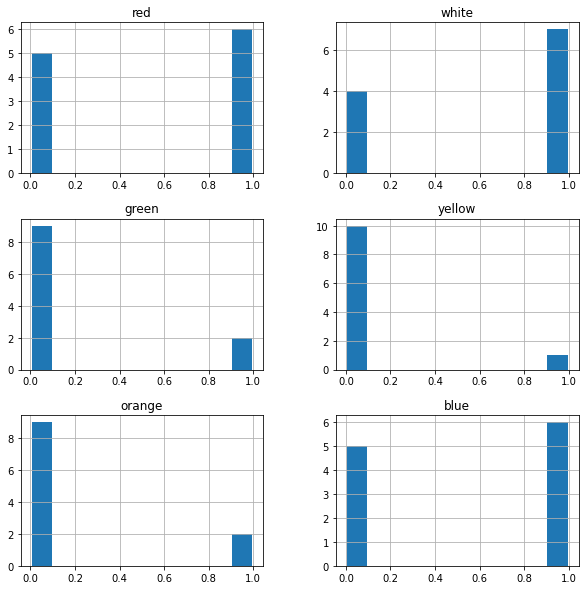

In [20]:
myphonedata.hist(grid=True, rwidth=0.9, figsize=(10,10)) 

<AxesSubplot:>

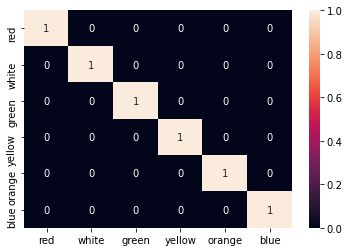

In [22]:
a = myphonedata.corr(method ='pearson')
sns.heatmap(a>0.85,annot=True)

<AxesSubplot:>

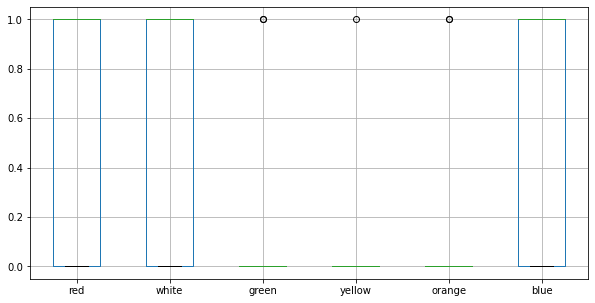

In [23]:
myphonedata.boxplot(grid=True,figsize=(10,5))

<ipython-input-24-bced49d0d399>:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(1, 11)), height = frequent_itemsets.support[1:11], color ='rgmyk')


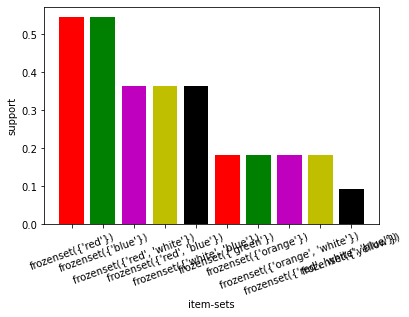

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
8,"(red, white)",(green),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909
9,"(red, green)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf


In [24]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(myphonedata, min_support = 0.05, max_len = 3, use_colnames = True)

# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)

plt.bar(x = list(range(1, 11)), height = frequent_itemsets.support[1:11], color ='rgmyk')
plt.xticks(list(range(1, 11)), frequent_itemsets.itemsets[1:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules

In [25]:
################################# Extra part ###################################
#Redudancy is defined as the storing of same data multiple time#
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
14,"(orange, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
8,"(red, white)",(green),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909


# Summary:
1- Above the 10 unique Rule that we get by Apply Apriori Algo.

2- Antecedent support variable tells us probability of antecedent product alone.

3- The Support Value is the value of the two Product(Antecedents and Consequents)

4- Confidence is an indication of how often the rule has been found to be True.

5-The ratio of the observed support to that expected if X and Y were independent.